In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
import pandas as pd

In [5]:
s_true = pd.read_csv('./P4_trajectory.txt', header=None)

Am I supposed to plot 3d here? Or just x, y, and z separately?

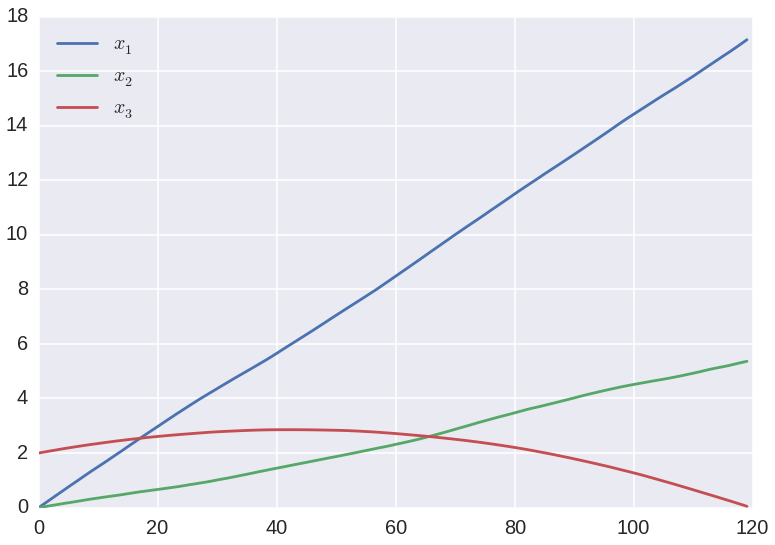

In [6]:
plt.plot(s_true.loc[:, 0:2])
plt.legend([r'$x_1$', r'$x_2$', r'$x_3$'], loc='best')

In [7]:
measurements = pd.read_csv('./P4_measurements.txt', header=None)

In [8]:
rx = 0.5
ry = 0.5
rz = 0.5

In [9]:
rescale_matrix = np.array([[1/rx, 0, 0],
                           [0, 1/ry, 0],
                           [0, 0, 1/rz]
                           ])

Luckily we can decompose this. But, we can try to be slightly more clever, in case the matrix elements become correlated...

In [10]:
np.apply_along_axis(lambda x: rescale_matrix * x, 1, measurements)

ValueError: could not broadcast input array from shape (3,3) into shape (3)

In [11]:
measurements.loc[0, :]

0    -0.28359
1     0.51762
2    13.77800
Name: 0, dtype: float64

In [12]:
rescale_matrix*measurements.loc[0, :].values

array([[ -0.56718,   0.     ,   0.     ],
       [ -0.     ,   1.03524,   0.     ],
       [ -0.     ,   0.     ,  27.556  ]])

Let's just decouple these.

Ok, now for the third part. We have to create the propagation matrix.

In [13]:
c = 1.
deltaT = 1.
A = np.array([
        [1, 0, 0, deltaT, 0, 0],
        [0, 1, 0, 0, deltaT, 0],
        [0, 0, 1, 0, 0, deltaT],
        [0, 0, 0, 1- c*deltaT, 0, 0],
        [0, 0, 0, 0, 1 - c*deltaT, 0],
        [0, 0, 0, 0, 0, 1-c*deltaT]
    ])

In [14]:
A.shape

(6, 6)

In [15]:
g = 9.81

In [16]:
a = np.array([[0, 0, 0, 0, 0, g*deltaT]]).T

In [17]:
s0 = np.array([[0, 0, 2, 15, 3.5, 4.0]]).T

In [18]:
np.dot(A, s0) + a

array([[ 15.  ],
       [  3.5 ],
       [  6.  ],
       [  0.  ],
       [  0.  ],
       [  9.81]])

Looks good! Let's put it together.

In [19]:
### Define arrays and such
c = 1.
deltaT = 1.
A = np.array([
        [1, 0, 0, deltaT, 0, 0],
        [0, 1, 0, 0, deltaT, 0],
        [0, 0, 1, 0, 0, deltaT],
        [0, 0, 0, 1- c*deltaT, 0, 0],
        [0, 0, 0, 0, 1 - c*deltaT, 0],
        [0, 0, 0, 0, 0, 1-c*deltaT]
    ])
a = np.array([[0, 0, 0, 0, 0, g*deltaT]]).T
s0 = np.array([[0, 0, 2, 15, 3.5, 4.0]]).T

K = 20
positions = np.zeros((6, K), dtype = np.double)
positions[:, 0] = s0[:, 0]
for i in range(1, K):
    cur_position = positions[:, i-1]
    cur_position = np.array([cur_position]).T
    update_position = np.dot(A, cur_position) + a
    positions[:, i] = update_position[1, :]

In [27]:
positions[0, :]

array([  0.00000000e+00,   3.50000000e+00,   7.00000000e+00,
         1.40000000e+01,   2.80000000e+01,   5.60000000e+01,
         1.12000000e+02,   2.24000000e+02,   4.48000000e+02,
         8.96000000e+02,   1.79200000e+03,   3.58400000e+03,
         7.16800000e+03,   1.43360000e+04,   2.86720000e+04,
         5.73440000e+04,   1.14688000e+05,   2.29376000e+05,
         4.58752000e+05,   9.17504000e+05])

In [64]:
positions[:, 0:2]

array([[  0. ,   3.5],
       [  0. ,   3.5],
       [  2. ,   3.5],
       [ 15. ,   3.5],
       [  3.5,   3.5],
       [  4. ,   3.5]])

In [38]:
derp1 = np.random.rand(6, 1)
derp2 = np.random.rand(6, 1)

In [44]:
derp1

array([[ 0.49762316],
       [ 0.23234209],
       [ 0.03998414],
       [ 0.68621723],
       [ 0.72068933],
       [ 0.22634364]])

In [45]:
derp2

array([[ 0.62598458],
       [ 0.51669154],
       [ 0.282985  ],
       [ 0.31770813],
       [ 0.16939014],
       [ 0.97002922]])

In [48]:
np.cov(derp1, derp2, bias=1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [37]:
derp1

array([[ 0.96812606,  0.78881519,  0.57315547,  0.47814561,  0.1819669 ,
         0.57633906]])